In [41]:
from __future__ import division, print_function, absolute_import
import tellurium as te, numpy as np

In [42]:
te.setDefaultPlottingEngine('matplotlib')

In [43]:
model *p53arf()

  // Compartments and Species:
  compartment cell;
  substanceOnly species Mdm2 in cell, p53 in cell, Mdm2_p53 in cell, Mdm2_mRNA in cell;
  substanceOnly species ARF in cell, ARF_Mdm2 in cell, damDNA in cell, $Sink in cell;
  substanceOnly species $Source in cell, p53deg in cell, p53syn in cell, mdm2deg in cell;
  substanceOnly species mdm2syn in cell, Mdm2mRNAdeg in cell, Mdm2mRNAsyn in cell;
  substanceOnly species totdamDNA in cell, $totp53 in cell, $totMdm2 in cell;

  // Assignment Rules:
  totp53 := p53 + Mdm2_p53;
  totMdm2 := Mdm2 + Mdm2_p53 + ARF_Mdm2;

  // Reactions:
  Mdm2Synthesis: Mdm2_mRNA => Mdm2_mRNA + Mdm2 + mdm2syn; ksynMdm2*Mdm2_mRNA;
  Mdm2mRNASynthesis: p53 => p53 + Mdm2_mRNA + Mdm2mRNAsyn; ksynMdm2mRNA*p53;
  Mdm2mRNADegradation: Mdm2_mRNA => $Sink + Mdm2mRNAdeg; kdegMdm2mRNA*Mdm2_mRNA;
  Mdm2Degradation: Mdm2 => $Sink + mdm2deg; kdegMdm2*Mdm2*kproteff;
  p53Synthesis: $Source => p53 + p53syn; ksynp53*Source;
  p53Degradation: Mdm2_p53 => Mdm2 + p53deg; kdegp53*Mdm2_p53*kproteff;
  P53_Mdm2Binding: p53 + Mdm2 => Mdm2_p53; kbinMdm2p53*p53*Mdm2;
  P53_Mdm2Release: Mdm2_p53 => p53 + Mdm2; krelMdm2p53*Mdm2_p53;
  DNAdamage:  => damDNA + totdamDNA; kdam*IR;
  DNArepair: damDNA => $Sink; krepair*damDNA;
  ARFactivation: damDNA => damDNA + ARF; kactARF*damDNA;
  ARF_Mdm2Binding: ARF + Mdm2 => ARF_Mdm2; kbinARFMdm2*ARF*Mdm2;
  ARF_Mdm2Degradation: ARF_Mdm2 => ARF + mdm2deg; kdegARFMdm2*ARF_Mdm2*kproteff;
  ARFDegradation: ARF => $Sink; kdegARF*ARF*kproteff;

  // Events:
  stressCell: at time >= 3600: IR = 25;
  stopStress: at time >= 3660: IR = 0;

  // Species initializations:
  Mdm2 = 5/cell;
  p53 = 5/cell;
  Mdm2_p53 = 95/cell;
  Mdm2_mRNA = 0;
  ARF = 0;
  ARF_Mdm2 = 0;
  damDNA = 0;
  Sink = 1/cell;
  Source = 1/cell;
  p53deg = 0;
  p53syn = 0;
  mdm2deg = 0;
  mdm2syn = 0;
  Mdm2mRNAdeg = 0;
  Mdm2mRNAsyn = 0;
  totdamDNA = 0;

  // Compartment initializations:
  cell = 1;

  // Variable initializations:
  IR = 0;
  IR has decagray;
  ksynMdm2 = 0.000495;
  ksynMdm2 has psec;
  kdegMdm2 = 0.000433;
  kdegMdm2 has psec;
  ksynp53 = 0.078;
  ksynp53 has psec;
  kdegp53 = 0.000825;
  kdegp53 has psec;
  kbinMdm2p53 = 0.001155;
  kbinMdm2p53 has pmolepsec;
  krelMdm2p53 = 1.155e-05;
  krelMdm2p53 has psec;
  ksynMdm2mRNA = 0.0001;
  ksynMdm2mRNA has psec;
  kdegMdm2mRNA = 0.0001;
  kdegMdm2mRNA has psec;
  kbinARFMdm2 = 0.01;
  kbinARFMdm2 has pmolepsec;
  kdegARFMdm2 = 0.001;
  kdegARFMdm2 has psec;
  kdegARF = 0.0001;
  kdegARF has psec;
  kactARF = 3.3e-05;
  kactARF has psec;
  kdam = 0.08;
  kdam has molepsecpdGy;
  krepair = 2e-05;
  krepair has psec;
  kproteff = 1;
  kproteff has dimensionless;

  // Other declarations:
  var IR;
  const cell, ksynMdm2, kdegMdm2, ksynp53, kdegp53, kbinMdm2p53, krelMdm2p53;
  const ksynMdm2mRNA, kdegMdm2mRNA, kbinARFMdm2, kdegARFMdm2, kdegARF, kactARF;
  const kdam, krepair, kproteff;

  // Unit definitions:
  unit molepsecpdGy = mole / (second * 10 gray);
  unit decagray = 10 gray;
  unit molepsec = mole / second;
  unit pmolepsec = 1 / (mole * second);
  unit psec = 1 / second;

  // Display Names:
  decagray is "dGy";
end

Success: Model can be accessed via variable p53arf


In [44]:
model = p53arf
model.integrator = 'gillespie'
model.integrator.variable_step_size = False

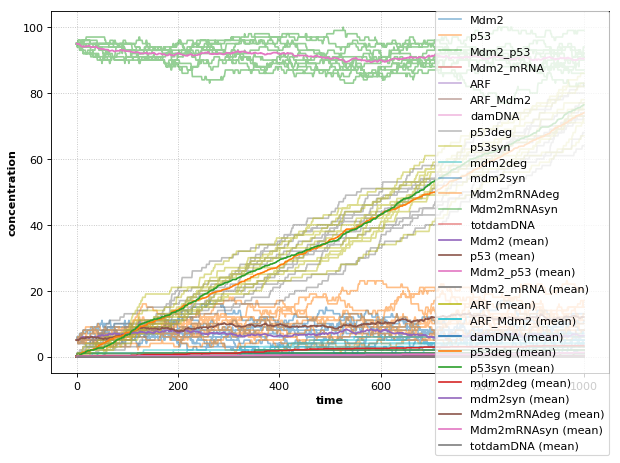

In [45]:
selections = ['time','Mdm2','p53','Mdm2_p53','Mdm2_mRNA','ARF','ARF_Mdm2','damDNA','p53deg','p53syn','mdm2deg','mdm2syn','Mdm2mRNAdeg','Mdm2mRNAsyn','totdamDNA']
model.reset()
N = 10 # replicates
points = 1000 # num of simulation points
s_sum = np.zeros(shape=[points, len(selections)])
for k in range(N):
    model.resetToOrigin()
    sim = model.simulate(0,1000,points,selections)
    s_sum += sim
    model.plot(sim, alpha=0.5, show=False)
# plot mean traces
fig = te.plot(sim[:,0], s_sum[:,1:]/N, names=[x + ' (mean)' for x in selections[1:]], title="Stochastic simulation", xtitle="time", ytitle="concentration")

# Try to fit
```
kdegMdm2
kdegp53
kbinMdm2p53
krelMdm2p53
kphosMdm2
kdephosMdm2
kdegATMMdm2
```